# The Birthday Problem 

Surprised when somebody shares a birthday with you ? A common application of probability shows that it isn't that uncommon. 

FloatSlider(value=0.5, description='Pick a probability for having a birthday collision', max=1.0, step=0.05)

<IPython.core.display.Javascript object>


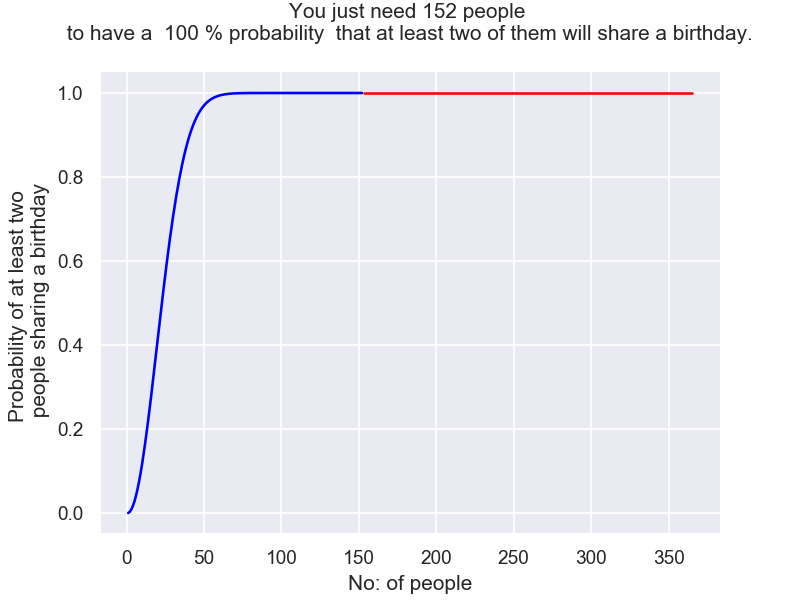

In [166]:
%matplotlib notebook 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import ipywidgets as widgets
from IPython.display import clear_output




x = np.arange(1,366)
P_Birthday = np.zeros(365)

#Creating a helper function for number of permutations 
def nPr(n,k) : 
    nPr = 1
    for i in range(n,n - k,-1):
        nPr = nPr*i       
    return nPr


# calculating the probabilities
for i in range(1, 366) :     
    P_Birthday[i-1]= 1- nPr(365,i)  / pow(365,i)
    

    
#Visualizing the results 
sns.set() 

def plot_birthday (alpha) :
    
    plt.clf()
    alpha = alpha['new']
    P_lower = np.ma.masked_where(P_Birthday >= alpha , P_Birthday)
    P_higher = np.ma.masked_where(P_Birthday < alpha , P_Birthday)
    plt.title("You just need {0} people \n to have a  {1:.0f} % probability  " 
          "that at least two of them will share a birthday. \n".format(np.amin(np.where(P_Birthday >= alpha)) , alpha*100))
    plt.plot( x, P_lower, c = 'blue' )
    plt.plot( x, P_higher, c = 'red' )
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("No: of people")
    ax.set_ylabel("Probability of at least two \n people sharing a birthday")

    
prob_select = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.05,
    description='Pick a probability for having a birthday collision',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


 
display(prob_select)
prob_select.observe(plot_birthday, names = 'value')


